## **Homework 3 Problem 5**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

## Cleaning Dataset

In [6]:
#Adding Personality Dataset
personality_data = pd.read_csv("C:/Users/devdw/Downloads/Behavioral Data Science/data.csv", header=0, delimiter=";")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [9]:
#Identify Full Column List of Dataset
personality_data.head()
print(personality_data.columns.tolist())

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'a

In [27]:
#Handling 0s and N/A in Dataset

#Handling 0s in Data
(personality_data == 0).sum()

#Converting 0s to N/A
personality_data = personality_data[(personality_data != 0).any(axis=1)]
personality_data.replace(0, np.nan, inplace=True)

#Handling N/A in Data
pd_nan_count = personality_data.isna().sum()
pd_nan_count

A1          702
A2          730
A3          617
A4          725
A5          458
A6          515
A7          324
A8          714
A9          754
A10         586
B1          706
B2          584
B3          535
B4          479
B5          760
B6          777
B7          723
B8          519
B9          727
B10         660
B11         330
B12         616
B13         507
C1          477
C2          562
C3          796
C4          545
C5          340
C6          710
C7          720
C8          329
C9          509
C10         628
D1          418
D2          501
D3          596
D4          686
D5          379
D6          786
D7          452
D8          549
D9          393
D10         638
E1          503
E2          719
E3          690
E4          489
E5          713
E6          573
E7          687
E8          567
E9          644
E10         616
F1          695
F2          629
F3          433
F4          498
F5          575
F6          694
F7          653
F8          642
F9          651
F10     

In [29]:
#Dropping Entire Row if N/A Values in Elapsed Column
for col in ["elapsed"]:
    personality_data.dropna(subset=[col], inplace=True)

#Replace N/A Values for Personality Variables (A-P) Using Mean
personality_col = [col for col in personality_data if col[0] in list("ABCDEFGHIJKLMNOP")]
for col in personality_col:
    personality_data[col].fillna(personality_data[col].mean(), inplace=True)

#Replace N/A Values for "Country" and "Gender" Using Mode
for col in ["country", "gender"]:
    personality_data.fillna(personality_data[col].mode()[0], inplace=True)

C:\Users\devdw\AppData\Local\Temp\ipykernel_29572\2515991710.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  personality_data[col].fillna(personality_data[col].mean(), inplace=True)
C:\Users\devdw\AppData\Local\Temp\ipykernel_29572\2515991710.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'US' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  personality_data.fillna(personality_data[col].mode()[0

In [32]:
#Filter based on elapsed time using Median Absolute Deviation
median_elapse = personality_data['elapsed'].median()
mad_elapse = np.median(np.abs(personality_data['elapsed'] - median_elapse))

#Define threshold multiplier
k = 3
lower_bound = median_elapse - k * mad_elapse
upper_bound = median_elapse + k * mad_elapse

print("Elapsed Time Cleaning:")
print("Median elapsed time:", median_elapse)
print("MAD elapsed time:", mad_elapse)
print("Lower bound:", lower_bound)
print("Upper bound", upper_bound)

Elapsed Time Cleaning:
Median elapsed time: 754.0
MAD elapsed time: 205.0
Lower bound: 139.0
Upper bound 1369.0


In [ ]:
#Re-checking for N/A vVlues
nan_count = personality_data.isna().sum()
nan_count #it worked - all NA count is 0

A1          0
A2          0
A3          0
A4          0
A5          0
A6          0
A7          0
A8          0
A9          0
A10         0
B1          0
B2          0
B3          0
B4          0
B5          0
B6          0
B7          0
B8          0
B9          0
B10         0
B11         0
B12         0
B13         0
C1          0
C2          0
C3          0
C4          0
C5          0
C6          0
C7          0
C8          0
C9          0
C10         0
D1          0
D2          0
D3          0
D4          0
D5          0
D6          0
D7          0
D8          0
D9          0
D10         0
E1          0
E2          0
E3          0
E4          0
E5          0
E6          0
E7          0
E8          0
E9          0
E10         0
F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
G1          0
G2          0
G3          0
G4          0
G5          0
G6          0
G7          0
G8          0
G9    

In [42]:
#Filter out rows with elapsed times outside the bounds
pd_cleaned = personality_data[(personality_data['elapsed'] >= lower_bound) & (personality_data['elapsed'] <= upper_bound)]

In [41]:
#Information on Dataset:
print("Original number of responses:", personality_data.shape[0])
print("Number of responses after filtering on elapsed time:", pd_cleaned.shape[0])
print(pd_cleaned.describe())

Original number of responses: 49149
Number of responses after filtering on elapsed time: 41646
                 A1            A2            A3            A4            A5            A6            A7            A8            A9           A10            B1            B2            B3            B4            B5            B6            B7            B8            B9           B10           B11           B12           B13            C1            C2            C3            C4            C5            C6            C7            C8            C9           C10            D1            D2            D3            D4            D5            D6            D7            D8            D9           D10            E1            E2            E3            E4            E5            E6            E7            E8            E9           E10            F1            F2            F3            F4            F5            F6            F7            F8            F9           F10            G1    

## Exploratory Analysis

In [44]:
# Extract only the personality items (columns starting with A–P)
personality_cols = [col for col in pd_cleaned.columns if col[0] in list("ABCDEFGHIJKLMNOP")]
personality_df = pd_cleaned[personality_cols]

In [45]:
#Compute Correlation Matrix
corr_matrix = personality_df.corr()

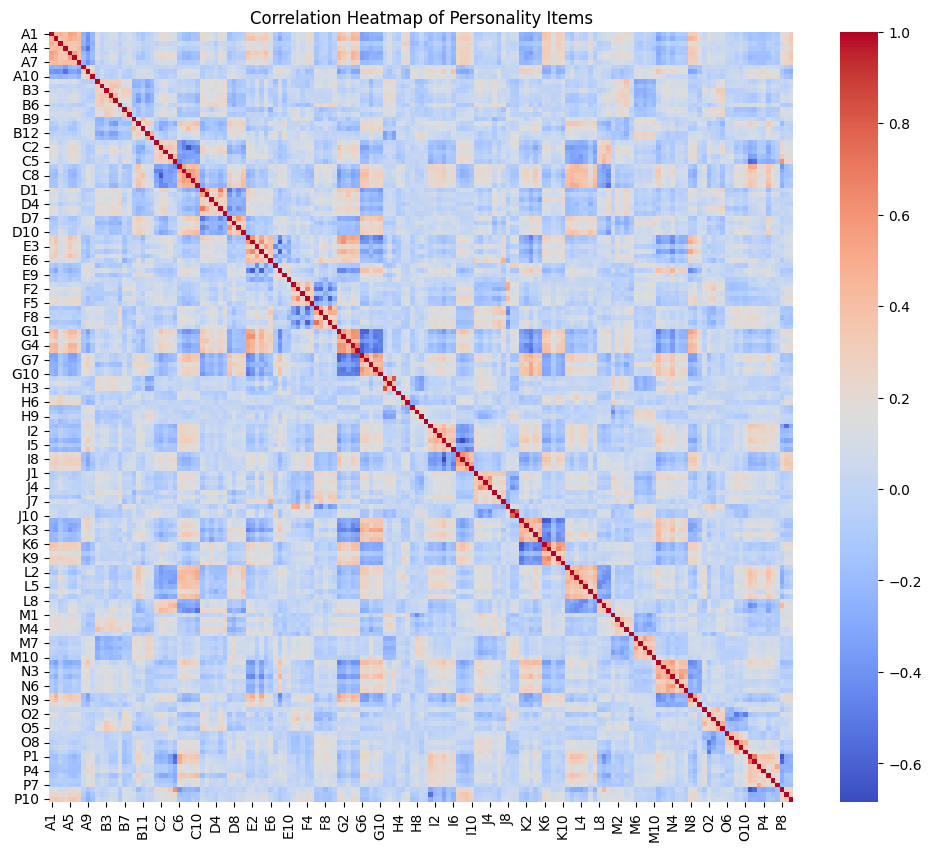

In [54]:
#Plot Heatmap of Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Personality Items")
plt.show()

In [ ]:
#Subscale Analysis to Narrow Which Variables Should Be Included

#Subscale Dictionary
subscale_dict = {
    'A': ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10'],
    'B': ['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13'],
    'C': ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'],
    'D': ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10'],
    'E': ['E1','E2','E3','E4','E5','E6','E7','E8','E9','E10'],
    'F': ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10'],
    'G': ['G1','G2','G3','G4','G5','G6','G7','G8','G9','G10'],
    'H': ['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10'],
    'I': ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10'],
    'J': ['J1','J2','J3','J4','J5','J6','J7','J8','J9','J10'],
    'K': ['K1','K2','K3','K4','K5','K6','K7','K8','K9','K10'],
    'L': ['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10'],
    'M': ['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10'],
    'N': ['N1','N2','N3','N4','N5','N6','N7','N8','N9','N10'],
    'O': ['O1','O2','O3','O4','O5','O6','O7','O8','O9','O10'],
    'P': ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']
}

#Compute Subscale Means for Each Participant
subscale_mean = pd.DataFrame()
for subscale, items in subscale_dict.items():
    valid_items = [item for item in items if item in pd_cleaned.columns]
    subscale_mean[subscale] = pd_cleaned[valid_items].mean(axis=1)

In [50]:
#Compute Correlation Matrix Among Subscale Means
corr_subscale = subscale_mean.corr()

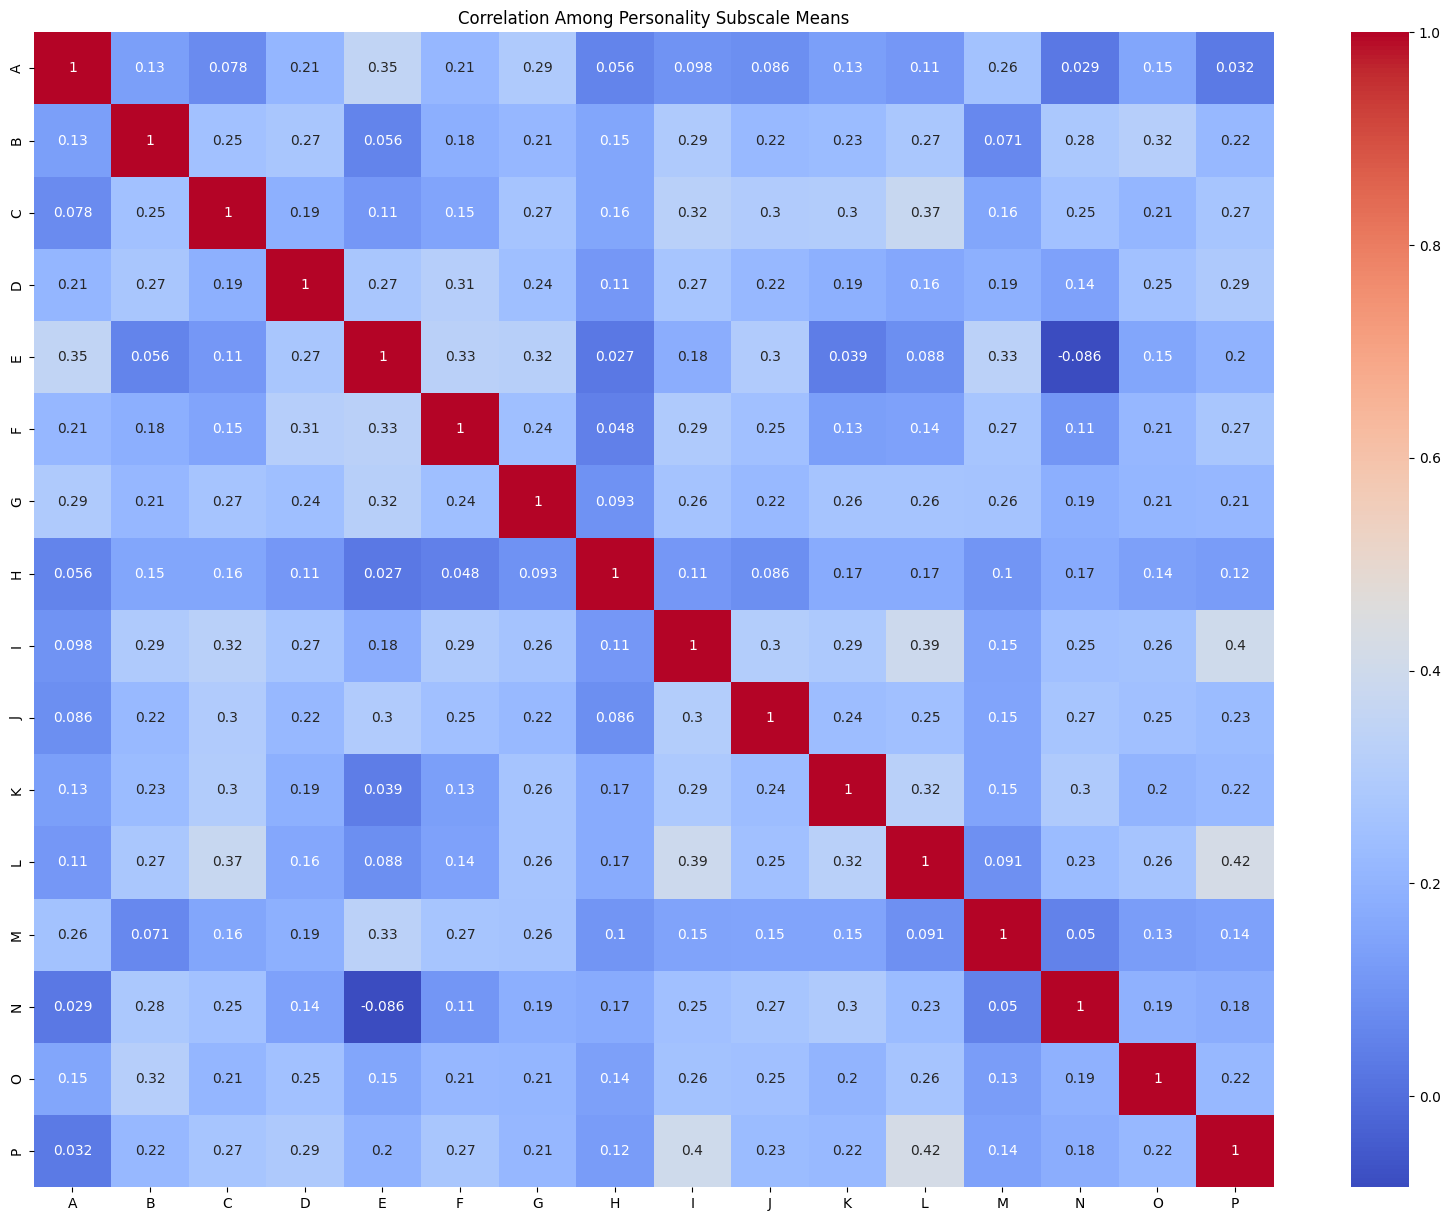

In [ ]:
#Plot Heatmap of Subscale-Level Correlations
plt.figure(figsize=(20,15))
sns.heatmap(corr_subscale, cmap='coolwarm', annot=True)
plt.title("Correlation Among Personality Subscale Means")
plt.show()

#Based on this graph, I am choosing to analyze C, D, I, L, and P

## PCA Analysis

In [56]:
#Selecting Individual Items from Chosen Subscales
chosen_subscales = ["C", "D", "I", "L", "P"]
selected_cols = [col for col in pd_cleaned.columns if col[0] in chosen_subscales]
selected_data = pd_cleaned[selected_cols]

print("Selected columns for analysis:", selected_cols)

Selected columns for analysis: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']


In [63]:
#Standardizing Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

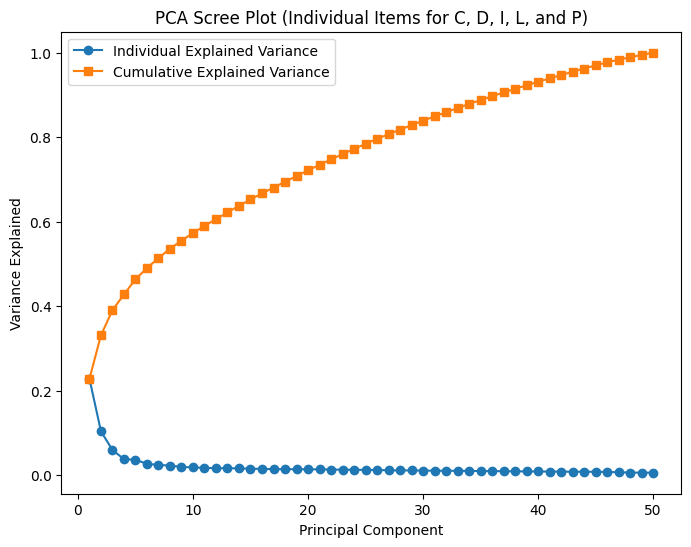

In [71]:
#PCA Analysis
pca_items = PCA().fit(scaled_data)
explained_variance = pca_items.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label="Individual Explained Variance")
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', label="Cumulative Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Scree Plot (Individual Items for C, D, I, L, and P)")
plt.legend()
plt.show()

In [65]:
print("PCA Explained Variance Ratios:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.4f}")

most_explained_pc = np.argmax(explained_variance) + 1
print(f"\nPrincipal Component {most_explained_pc} explains the most variance.")

PCA Explained Variance Ratios:
PC1: 0.2278
PC2: 0.1033
PC3: 0.0592
PC4: 0.0373
PC5: 0.0360
PC6: 0.0264
PC7: 0.0237
PC8: 0.0223
PC9: 0.0190
PC10: 0.0180
PC11: 0.0169
PC12: 0.0161
PC13: 0.0160
PC14: 0.0156
PC15: 0.0149
PC16: 0.0143
PC17: 0.0139
PC18: 0.0137
PC19: 0.0136
PC20: 0.0135
PC21: 0.0132
PC22: 0.0128
PC23: 0.0125
PC24: 0.0123
PC25: 0.0120
PC26: 0.0118
PC27: 0.0111
PC28: 0.0108
PC29: 0.0107
PC30: 0.0105
PC31: 0.0101
PC32: 0.0100
PC33: 0.0098
PC34: 0.0097
PC35: 0.0093
PC36: 0.0091
PC37: 0.0089
PC38: 0.0085
PC39: 0.0084
PC40: 0.0083
PC41: 0.0080
PC42: 0.0079
PC43: 0.0077
PC44: 0.0077
PC45: 0.0074
PC46: 0.0072
PC47: 0.0063
PC48: 0.0058
PC49: 0.0054
PC50: 0.0053

Principal Component 1 explains the most variance.


In [72]:
# Convert it into a DataFrame for easier interpretation
pca = PCA(n_components=5).fit(scaled_data)
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings,
                           index = selected_data.columns,
                           columns=[f"PC{i+1}" for i in range(5)])
print(loadings_df)

          PC1       PC2       PC3       PC4       PC5
C1  -0.132266  0.013245 -0.010885  0.167127  0.177928
C2  -0.182220  0.070094  0.065254  0.134491  0.143147
C3  -0.151163  0.103626  0.043544  0.145288 -0.051564
C4  -0.158133 -0.025017 -0.068841  0.247966  0.114079
C5  -0.168960 -0.078020 -0.160303  0.249043 -0.142722
C6   0.188141  0.027939  0.126458 -0.014127 -0.033018
C7   0.204115 -0.033361  0.005116 -0.015640 -0.193424
C8   0.196871 -0.063455 -0.056588 -0.012102 -0.171797
C9   0.190485 -0.066034  0.024791  0.087882 -0.136969
C10  0.201356 -0.116280  0.039421  0.036272  0.023121
D1  -0.104593  0.219541  0.277644  0.056152 -0.159500
D2  -0.033014  0.203786  0.263587  0.120654 -0.135840
D3  -0.066387  0.171184  0.152970  0.052725 -0.022537
D4  -0.059238  0.205851  0.075656  0.094393 -0.040854
D5  -0.084481  0.212862  0.258304  0.072803 -0.143843
D6  -0.067914  0.177080  0.108428  0.134844 -0.174326
D7   0.121731 -0.216430 -0.149627  0.161934  0.181063
D8   0.077060 -0.153256 -0.0

In [75]:
pc1_loading = loadings_df['PC1'].abs().sort_values(ascending=False)
print("\nItems with highest absolute loadings on PC1:")
print(pc1_loading.head(10))

print("\nSigned PC1 loadings, sorted by magnitude:")
print(loadings_df["PC1"].sort_values(ascending=False, key=abs))


Items with highest absolute loadings on PC1:
C7     0.204115
C10    0.201356
C8     0.196871
L2     0.196432
P1     0.192876
C9     0.190485
C6     0.188141
C2     0.182220
L4     0.180764
L3     0.180030
Name: PC1, dtype: float64

Signed PC1 loadings, sorted by magnitude:
C7     0.204115
C10    0.201356
C8     0.196871
L2     0.196432
P1     0.192876
C9     0.190485
C6     0.188141
C2    -0.182220
L4     0.180764
L3     0.180030
L10   -0.172811
L7     0.172089
L1     0.170393
P2     0.169678
C5    -0.168960
L9    -0.166899
L5     0.165531
P5     0.164643
I4     0.158493
C4    -0.158133
P8    -0.157388
C3    -0.151163
I1     0.142848
L8    -0.134698
D10    0.132399
C1    -0.132266
I2     0.131891
I3     0.131416
I8    -0.125523
D7     0.121731
I9    -0.119606
I6     0.116117
P6     0.113952
P4     0.107222
P3     0.107117
D1    -0.104593
P9    -0.103438
I5     0.097079
L6     0.094126
I7    -0.092932
I10   -0.091299
D9     0.087078
P10   -0.085260
D5    -0.084481
P7     0.079487
D8   

## Factor Analysis

In [76]:
# We choose to extract 5 factors, one for each subscale, as an initial approach.
fa_items = FactorAnalysis(n_components=5)
fa_items.fit(scaled_data)
fa_loadings_items = fa_items.components_.T

In [77]:
# Create a DataFrame to inspect loadings
loadings_items_df = pd.DataFrame(fa_loadings_items, index=selected_cols,
                                 columns=[f'Factor{i+1}' for i in range(5)])
print("\nFactor Analysis Loadings (Individual Items):")
print(loadings_items_df)


Factor Analysis Loadings (Individual Items):
      Factor1   Factor2   Factor3   Factor4   Factor5
C1  -0.425345  0.046568  0.012732 -0.056478 -0.227330
C2  -0.591099  0.182602 -0.088605 -0.101701 -0.244624
C3  -0.479394  0.240950 -0.031158  0.053127 -0.136314
C4  -0.517189 -0.050116  0.098558 -0.022462 -0.291275
C5  -0.584892 -0.174661  0.277387  0.289210 -0.149627
C6   0.626777  0.044911 -0.197257  0.023533 -0.004350
C7   0.667171 -0.107896 -0.002694  0.189379  0.108734
C8   0.641835 -0.176904  0.084836  0.180744  0.125065
C9   0.614961 -0.175760 -0.038379  0.218483 -0.010461
C10  0.649436 -0.279879 -0.087524  0.085159 -0.019826
D1  -0.340305  0.560726 -0.397286  0.303332  0.036569
D2  -0.101656  0.477540 -0.342616  0.287673 -0.045094
D3  -0.192225  0.359663 -0.179335  0.002533 -0.081787
D4  -0.169963  0.414399 -0.058013  0.038083 -0.106610
D5  -0.271589  0.530773 -0.353948  0.284495  0.006294
D6  -0.203322  0.371255 -0.098604  0.152237 -0.083978
D7   0.385733 -0.523667  0.178066 -0

In [79]:
#Evaluate the Subscale Structure

# For each subscale letter, inspect the loadings:
for letter in chosen_subscales:
    subscale_items = [col for col in selected_cols if col.startswith(letter)]
    print(f"\nLoadings for subscale {letter}:")
    print(loadings_items_df.loc[subscale_items])
    
    # Optionally, flag items with low loadings (e.g., <0.4 on all factors)
    for item in subscale_items:
        if (loadings_items_df.loc[item].abs() < 0.4).all():
            print(f"Item {item} has low loadings on all factors and might be considered for removal.")


Loadings for subscale C:
      Factor1   Factor2   Factor3   Factor4   Factor5
C1  -0.425345  0.046568  0.012732 -0.056478 -0.227330
C2  -0.591099  0.182602 -0.088605 -0.101701 -0.244624
C3  -0.479394  0.240950 -0.031158  0.053127 -0.136314
C4  -0.517189 -0.050116  0.098558 -0.022462 -0.291275
C5  -0.584892 -0.174661  0.277387  0.289210 -0.149627
C6   0.626777  0.044911 -0.197257  0.023533 -0.004350
C7   0.667171 -0.107896 -0.002694  0.189379  0.108734
C8   0.641835 -0.176904  0.084836  0.180744  0.125065
C9   0.614961 -0.175760 -0.038379  0.218483 -0.010461
C10  0.649436 -0.279879 -0.087524  0.085159 -0.019826

Loadings for subscale D:
      Factor1   Factor2   Factor3   Factor4   Factor5
D1  -0.340305  0.560726 -0.397286  0.303332  0.036569
D2  -0.101656  0.477540 -0.342616  0.287673 -0.045094
D3  -0.192225  0.359663 -0.179335  0.002533 -0.081787
D4  -0.169963  0.414399 -0.058013  0.038083 -0.106610
D5  -0.271589  0.530773 -0.353948  0.284495  0.006294
D6  -0.203322  0.371255 -0.098

In [81]:
# Calculate communalities as sum of squared loadings across factors for each item
communalities = np.sum(fa_items.components_.T ** 2, axis=1)
communalities_df = pd.DataFrame(communalities, index=selected_cols, columns=['Communality'])
print("\nCommunalities:")
print(communalities_df)

#Sort communalities from Highest to Lowest and Select Top 10:
top10_communalities = communalities_df.sort_values(by='Communality', ascending=False).head(10)
print("Top 10 Highest Communalities:")
print(top10_communalities)


Communalities:
     Communality
C1      0.238118
C2      0.460776
C3      0.310250
C4      0.365056
C5      0.555580
C6      0.434349
C7      0.504454
C8      0.498754
C9      0.458386
C10     0.515405
D1      0.681405
D2      0.440553
D3      0.205164
D4      0.216796
D5      0.561736
D6      0.219121
D7      0.547433
D8      0.200772
D9      0.415001
D10     0.417944
I1      0.350730
I2      0.409011
I3      0.307760
I4      0.627373
I5      0.223964
I6      0.367448
I7      0.541495
I8      0.626201
I9      0.528874
I10     0.336179
L1      0.426334
L2      0.468576
L3      0.477096
L4      0.422587
L5      0.340684
L6      0.281201
L7      0.378762
L8      0.266991
L9      0.406611
L10     0.412658
P1      0.706721
P2      0.610316
P3      0.316034
P4      0.291804
P5      0.321763
P6      0.231757
P7      0.210424
P8      0.607495
P9      0.276748
P10     0.252983
Top 10 Highest Communalities:
    Communality
P1     0.706721
D1     0.681405
I4     0.627373
I8     0.626201
P2     